In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Capital punishment pre 1974
csv_file_pre = "rawICPSRpre1974.csv"
df_pre = pd.read_csv(csv_file_pre)
df_pre.head()

,Unnamed: 0,raw,ICPSR Number,ICPSR Edition Number,ICPSR Part Number,Case Number,Race of Offender,Age at Execution,Name of Offender,Place of Execution,...,Crimes Committed,Method of Execution,Day,Month,Year,State,County,Sex,CountyName,StateName
0,13063,8451415100011 KENDALL GEORGE 261...,8451,4,1,51000,1,,KENDALL GEORGE,2,...,18,4,,,1608,51,95,NaN,James City County,Virginia
1,13064,8451415100021 FRANK DANIELL 264...,8451,4,1,51000,1,,FRANK DANIELL,2,...,43,1,1,3,1622,51,95,NaN,James City County,Virginia
2,13065,8451415100031 CORNISH RICHARD 263...,8451,4,1,51000,1,,CORNISH RICHARD,2,...,30,1,,,1624,51,95,NaN,James City County,Virginia
3,13066,845141510004121HAYLE THOMAS 260...,8451,4,1,51000,1,21,HAYLE THOMAS,2,...,2,1,6,,1626,51,95,NaN,James City County,Virginia
4,5796,845141250001140BILLINGTON JOHN 260...,8451,4,1,25000,1,40,BILLINGTON JOHN,2,...,1,1,30,9,1630,25,23,NaN,Whitman town,Massachusetts


In [3]:
#Capital punishment post 1974
csv_file_post = "rawICPSRpost1974.csv"
df_post = pd.read_csv(csv_file_post)

In [4]:
#Clean Datasets for ML

#Pre 1974
df_pre['Method of Execution'].replace(' ', np.nan, inplace=True)
df_pre = df_pre[pd.notnull(df_pre['Method of Execution'])]
df_pre['Crimes Committed'].replace('  ', np.nan, inplace=True)
df_pre = df_pre[pd.notnull(df_pre['Crimes Committed'])]
df_pre['Race of Offender'].replace(' ', np.nan, inplace=True)
df_pre = df_pre[pd.notnull(df_pre['Race of Offender'])]
df_pre['Place of Execution'].replace(' ', np.nan, inplace=True)
df_pre = df_pre[pd.notnull(df_pre['Place of Execution'])]

#Post 1974
df_post['Method of Execution'].replace(' ', np.nan, inplace=True)
df_post = df_post[pd.notnull(df_post['Method of Execution'])]
df_post['Crimes Committed'].replace('  ', np.nan, inplace=True)
df_post = df_post[pd.notnull(df_post['Crimes Committed'])]
df_post['Race of Offender'].replace(' ', np.nan, inplace=True)
df_post = df_post[pd.notnull(df_post['Race of Offender'])]
df_post['Place of Execution'].replace(' ', np.nan, inplace=True)
df_post = df_post[pd.notnull(df_post['Place of Execution'])]

In [5]:
#Convert String to Int

#Pre 1974
df_pre['Method of Execution'] = df_pre['Method of Execution'].astype(int)
df_pre['Crimes Committed'] = df_pre['Crimes Committed'].astype(int)
df_pre['Race of Offender'] = df_pre['Race of Offender'].astype(int)
df_pre['Place of Execution'] = df_pre['Place of Execution'].astype(int)

#Post 1974
df_post['Method of Execution'] = df_post['Method of Execution'].astype(int)
df_post['Crimes Committed'] = df_post['Crimes Committed'].astype(int)
df_post['Race of Offender'] = df_post['Race of Offender'].astype(int)
df_post['Place of Execution'] = df_post['Place of Execution'].astype(int)

In [6]:
y_train = df_pre['Method of Execution']
y_test = df_post['Method of Execution']

In [7]:
X_train = df_pre[['Crimes Committed','Race of Offender','Place of Execution']]
X_test = df_post[['Crimes Committed','Race of Offender','Place of Execution']]

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.769/0.135
k: 3, Train/Test Score: 0.729/0.108
k: 5, Train/Test Score: 0.731/0.110
k: 7, Train/Test Score: 0.741/0.104
k: 9, Train/Test Score: 0.813/0.124
k: 11, Train/Test Score: 0.742/0.112
k: 13, Train/Test Score: 0.813/0.133
k: 15, Train/Test Score: 0.813/0.135
k: 17, Train/Test Score: 0.812/0.135
k: 19, Train/Test Score: 0.812/0.135


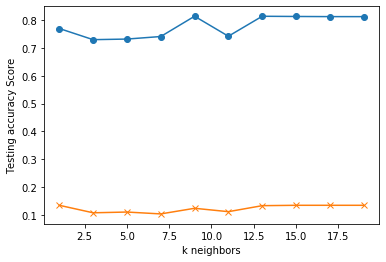

In [8]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
plt.savefig('CP-KNN.png')

<Figure size 432x288 with 0 Axes>